In [1]:
### LinearRegression

In [73]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [74]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [75]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
#하이퍼파라미터 튜닝
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[42]]))
print(knr.predict([[43]]))
print(knr.predict([[44]]))
print(knr.predict([[45]]))
print(knr.predict([[46]]))
print(knr.predict([[47]]))

[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]


In [77]:
distances, indexes =knr.kneighbors([[50]])

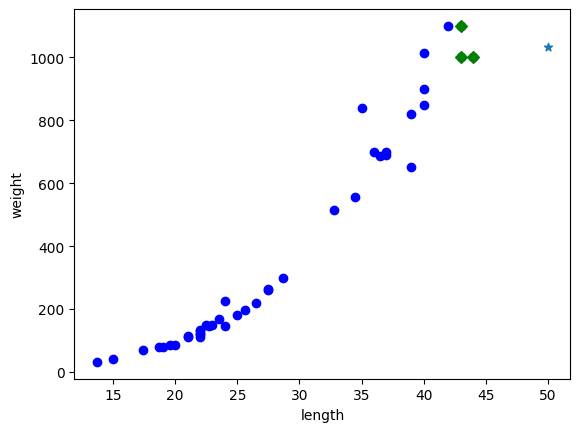

In [78]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target, color='blue')
plt.scatter(train_input[indexes], train_target[indexes], color='green', marker='D')
plt.scatter(50, 1033.3333333, marker='*')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [79]:
# -----------
# 대안 - 위 문제를 해결 하기 위한 선형회귀 모듈 사용
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [80]:
print(lr.predict([[50]]))
#1241.8386
print(lr.predict([[100]]))
#3192.695851
print(knr.predict([[50]]))
#1033.33333k


[1241.83860323]
[3192.69585141]
[1033.33333333]


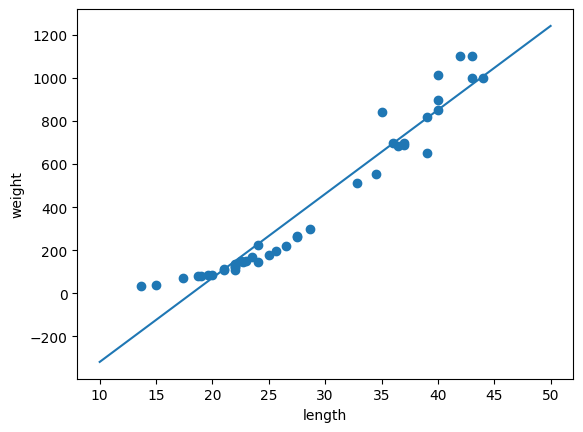

In [81]:
#---------------------
# 선형 그래프 그리기
#무게 = A *( 길이) + B
A = lr.coef_ # 계수
B = lr.intercept_ # 절편, 독립항
#X = train_input
#Y = A*X + B
#plt.plot(X,Y)
plt.plot([10,50], [10 * A + B, 50 * A + B])
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel("weight")
plt.show()

In [82]:
lr.predict([[50]]) == A*50 + B

array([ True])

In [83]:
lr.predict([[15]])

array([-123.7614705])

In [100]:
#다항회귀 모델의 그래프 그려보기
# x^2 과 x 값에 넣어줄 데이터를 만들어주는 과정
#train_poly = np.column_stack((train_input ** 3,train_input ** 2,train_input))
train_poly = np.column_stack((train_input ** 2,train_input))
print(train_poly)
lr = LinearRegression()
lr.fit(train_poly, train_target)
#lr.predict([[50 ** 2, 50]])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


LinearRegression()

[  1.01433211 -21.55792498] 116.05021078278264


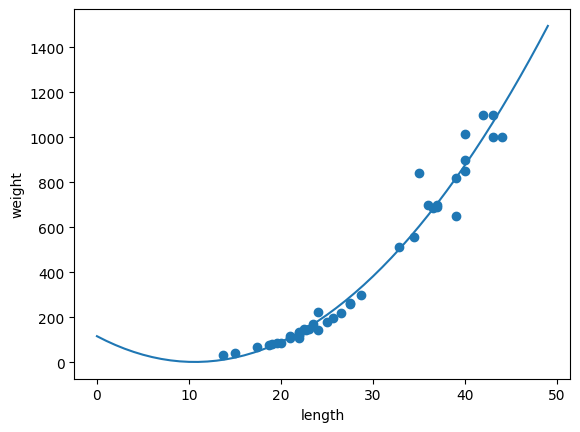

In [110]:
#다항식 : weight = (A * (length)^2) + (B*length) + (C)
print(lr.coef_, lr.intercept_)
A = lr.coef_[0]
B = lr.coef_[1]
#C = lr.coef_[2]
C = lr.intercept_

#다항식 차트로 그려보기 
points = np.arange(0,50)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.plot(points, A*points**2 + B*points + C)
#plt.plot(points, A*points**3 + B*points**2 + C*points + D)
plt.scatter()
plt.show()

In [109]:
print(lr.predict([[15**2,15]])[0])

20.90606070998669


In [111]:
import pickle

with open("/home/kim1/code/fishregression/src/fishregression/lr_model.pkl", "wb") as f:
    pickle.dump(lr, f)